**UNIVARIATE ANALYSIS**

**Distribution of Age Column**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('adult.csv')

In [4]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
data['age'].describe()

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

<Axes: >

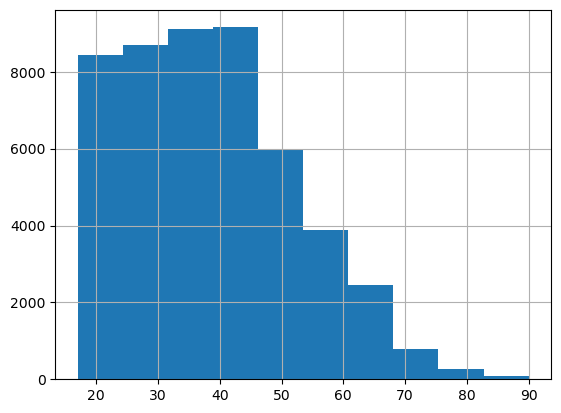

In [7]:
data['age'].hist()

**Find total number of persons having age between 17 to 48(inclusive) using between method**

In [11]:
len(data[(data['age']>=17) & (data['age']<=48)])

37321

In [12]:
sum((data['age']>=17) & (data['age']<=48))

37321

In [14]:
sum(data['age'].between(17,48))

37321

**what is the distribution of workclass columns**

In [15]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [17]:
data['workclass'].describe()

count       48842
unique          9
top       Private
freq        33906
Name: workclass, dtype: object

<Axes: >

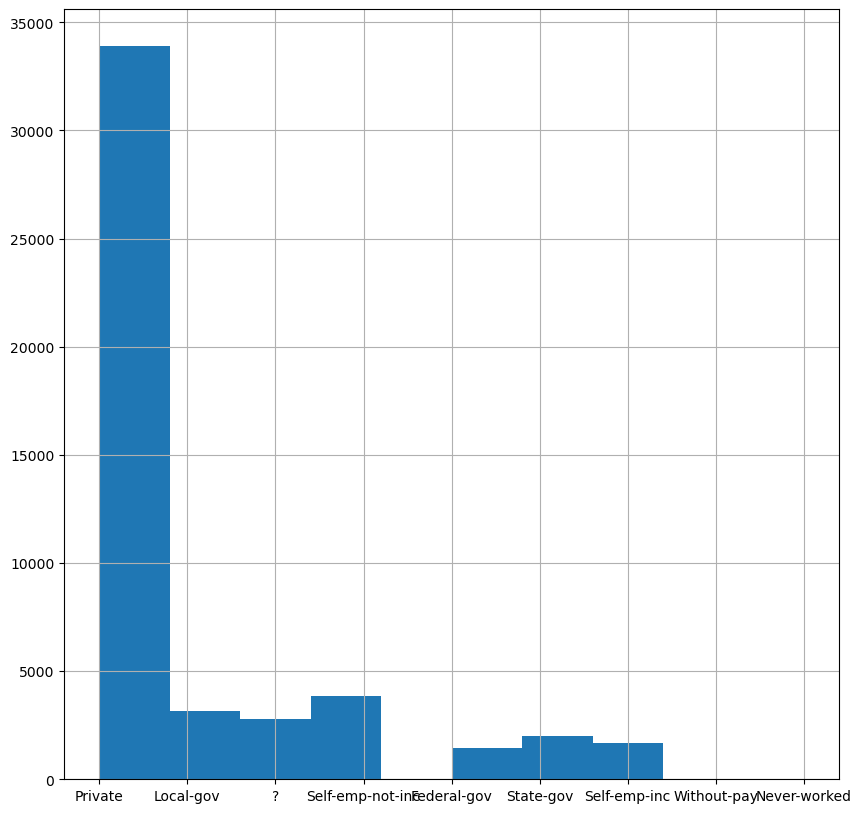

In [19]:
plt.figure(figsize=(10,10))
data['workclass'].hist()

**How many persons having bachrlors or master degrees**

In [20]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [21]:
data['education']

0                11th
1             HS-grad
2          Assoc-acdm
3        Some-college
4        Some-college
             ...     
48837      Assoc-acdm
48838         HS-grad
48839         HS-grad
48840         HS-grad
48841         HS-grad
Name: education, Length: 48842, dtype: object

In [29]:
filter1=data['education']=='Bachelors'

filter2=data['education']=='Masters'

In [30]:
len(data[filter1 | filter2])

48842

In [32]:
len(data['education'].isin(['Bachelors','Masters']))

48842

In [33]:
sum(data['education'].isin(['Bachelors','Masters']))

48842

**Bivariate Analysis**

In [34]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

<Axes: xlabel='income', ylabel='age'>

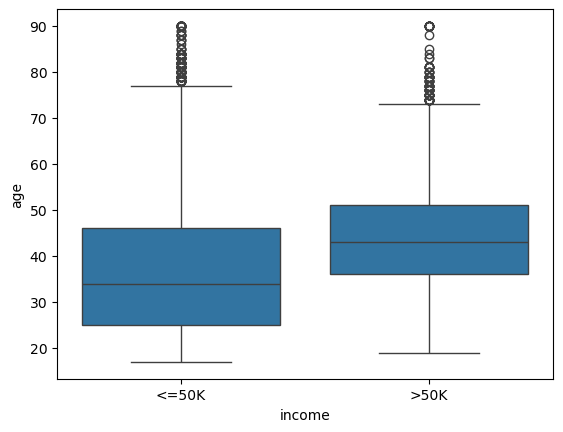

In [36]:
sns.boxplot(x='income',y='age',data=data)

**Replace salry values ['<=50k','>50k']with 0 and 1**

In [37]:
data.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [39]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [41]:
data['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

<Axes: xlabel='income', ylabel='count'>

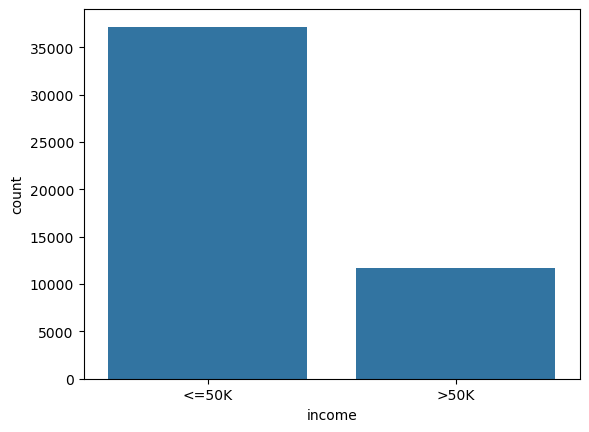

In [43]:
sns.countplot(x='income',data=data)

In [44]:
def income_data(sal):
    if sal=='<=50k':
        return 0
    else:
        return 1

In [46]:
data['encoded_sal']=data['income'].apply(income_data)

In [47]:
data.head(1)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,encoded_sal
0,25,Private,226802,Bachelors,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,1


In [58]:
data.replace(to_replace=['<=50k','>50k'],value=[0,1],inplace=True)

In [59]:
data.head(1)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,encoded_sal
0,25,Private,226802,Bachelors,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,1


**which workclass getting highest salary**

In [60]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'encoded_sal'],
      dtype='object')

In [61]:
# data['income'] = data['income'].map({'<=50K': 0, '>50K': 1})


In [62]:
data.groupby('workclass')['income'].mean().sort_values(ascending=False)

workclass
Self-emp-inc        0.553392
Federal-gov         0.391760
Local-gov           0.295599
Self-emp-not-inc    0.278871
State-gov           0.267542
Private             0.217867
Without-pay         0.095238
?                   0.094677
Never-worked        0.000000
Name: income, dtype: float64

**who has better chance to get salary >50k male or female**

In [63]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'encoded_sal'],
      dtype='object')

In [66]:
data.groupby('gender')['income'].mean().sort_values(ascending=False)

gender
Male      0.303767
Female    0.109251
Name: income, dtype: float64

**Convert workclass columns datatype to category datatype**

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  int64 
 15  encoded_sal      48842 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 6.0+ MB


In [69]:
data['workclass']=data['workclass'].astype('category')

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              48842 non-null  int64   
 1   workclass        48842 non-null  category
 2   fnlwgt           48842 non-null  int64   
 3   education        48842 non-null  object  
 4   educational-num  48842 non-null  int64   
 5   marital-status   48842 non-null  object  
 6   occupation       48842 non-null  object  
 7   relationship     48842 non-null  object  
 8   race             48842 non-null  object  
 9   gender           48842 non-null  object  
 10  capital-gain     48842 non-null  int64   
 11  capital-loss     48842 non-null  int64   
 12  hours-per-week   48842 non-null  int64   
 13  native-country   48842 non-null  object  
 14  income           48842 non-null  int64   
 15  encoded_sal      48842 non-null  int64   
dtypes: category(1), int64(8), object(7)
memo